### Importar librerías y cargar datos

In [1]:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim

In [2]:
# Nombre del archivo CSV con múltiples hojas
archivo_csv = "data/Base_2019.xlsx"

# Leer cada hoja del archivo CSV en un diccionario de DataFrames
diccionario_dataframes = pd.read_excel(archivo_csv, sheet_name=None)

# Iterar a través de las hojas y procesar cada DataFrame
for nombre_hoja, dataframe in diccionario_dataframes.items():
    # Imprimir el nombre de la hoja
    print("Hoja:", nombre_hoja)
    # Imprimir el contenido del DataFrame
    print(dataframe.head())
    print("---------------------------------------------------------------------------------")

Hoja: ACCIDENTES
   idFormulario      Dia      Fecha MES_PROCESADO   Oficina  GravedadCod  \
0             1    LUNES 2019-01-21         ENERO  11001000            2   
1             2   MARTES 2019-01-08         ENERO  11001000            3   
2             3   MARTES 2019-01-01         ENERO  11001000            2   
3             4   MARTES 2019-01-01         ENERO  11001000            3   
4             5  VIERNES 2019-01-18         ENERO  11001000            3   

  GravedadNombre  ClaseCodigo ClaseNombre  ChoqueCodigo  ... CON_CARGA  \
0    Con Heridos            2   Atropello           NaN  ...        NO   
1     Solo Daños            1      Choque           1.0  ...        NO   
2    Con Heridos            1      Choque           1.0  ...        NO   
3     Solo Daños            1      Choque           1.0  ...        NO   
4     Solo Daños            1      Choque           1.0  ...        NO   

   CON_EMBRIAGUEZ CON_HUECOS  CON_MENORES CON_MOTO  CON_PEATON  \
0              

### Análisis descriptivo inicial

In [3]:
def describe(df, nombre):
    print('******************************************************************************************')
    print(' *************************************  {}  **************************************'.format(nombre))
    print('******************************************************************************************')
    print()
    print('--> La dimensión de los {} es de {}'.format(nombre, df.shape))
    print()
    print('--> Las columnas de {} son: \n \n{} '.format(nombre, list(df.columns)))
    print()
    print('--> Información del Dataframe de {}:'.format(nombre))
    print()
    df.info()
    print()
    print("--> Registros vacíos por columna:")
    print()
    print(df.isnull().sum())
    print()
    print('--> Estadísticas descriptivas por columnas numericas:')
    print()
    print(df.describe(datetime_is_numeric=True))
    print()
    print('--> Estadísticas descriptivas por columnas categóricas:')
    print()
    print(df.describe(include=['object'])[list(set(df.columns) - set(df.select_dtypes(include=['number', 'datetime']).columns))[0:15]])
    print()
    print(df.describe(include=['object'])[list(set(df.columns) - set(df.select_dtypes(include=['number', 'datetime']).columns))[15:30]])
    print()
    print(df.describe(include=['object'])[list(set(df.columns) - set(df.select_dtypes(include=['number', 'datetime']).columns))[30:]])
    print()
    print()

for k,v in diccionario_dataframes.items():
    if k in ['CONDUCTORES']: # Eliminar para imprimir todos.
        describe(v,k)

******************************************************************************************
 *************************************  CONDUCTORES  **************************************
******************************************************************************************

--> La dimensión de los CONDUCTORES es de (66179, 42)

--> Las columnas de CONDUCTORES son: 
 
['idFormulario', 'Fecha', 'MES_PROCESADO', 'DIA_PROCESADO', 'Vehiculo', 'EDAD_PROCESADA', 'LLevaCinturon', 'LLevaChaleco', 'LLevaCasco', 'Sexo', 'GRAVEDAD_PROCESADA', 'ClaseOficial', 'GradoOficial', 'UnidadOficial', 'EstabaServicioOficial', 'PortaLicencia', 'CodigoCategoriaLicencia', 'CodigoRestriccionLicencia', 'FechaExpedicion', 'OficinaExpedicionLicencia', 'EsPropietarioVehiculo', 'ModeloVehiculo', 'CapacidadCarga', 'CantidadPasajeros', 'ClaseVehiculo', 'ServicioVehiculo', 'ModalidadVehiculo', 'RadioAccion', 'PosseSeguroResponsabilidad', 'TipoFalla', 'VEHICULO_VIAJABA_CLASIFICADO', 'CON_BICICLETA', 'CON_CARGA', 'CON_EMB

       PosseSeguroResponsabilidad GRAVEDAD_PROCESADA  \
count                       66179              66179   
unique                          2                  4   
top                             N              ILESA   
freq                        53983              56662   

                            OficinaExpedicionLicencia EsPropietarioVehiculo  \
count                                           66179                 65494   
unique                                             41                     2   
top     SECRETARIA DE TRANSITO Y TRANSPORTE DE BOGOTA                     N   
freq                                            49834                 45126   

       ServicioVehiculo CON_PEATON  
count             62265      66179  
unique                3          2  
top          Particular         NO  
freq              37363      62236  




### Selección preliminar de variables de interés

In [4]:
columns_deleted = [
    "ClaseOficial",
    "GradoOficial",
    "UnidadOficial",
    "FechaExpedicion",
    "EstabaServicioOficial",
    "Vehiculo",
    "RadioAccion",
    "CON_BICICLETA",
    "CON_CARGA",
    "CON_EMBRIAGUEZ",
    "CON_HUECOS",
    "CON_MENORES",
    "CON_MOTO",
    "CON_PEATON",
    "CON_PERSONA_MAYOR",
    "CON_RUTAS",
    "CON_TPI",
    "CON_VELOCIDAD",
]

columns_to_consider = [
    "idFormulario",
    "Fecha",
    "MES_PROCESADO",
    "DIA_PROCESADO",
    "EDAD_PROCESADA",
    "LLevaCinturon",
    "LLevaChaleco",
    "LLevaCasco",
    "Sexo",
    "GRAVEDAD_PROCESADA",
    "PortaLicencia",
    "CodigoCategoriaLicencia",
    "CodigoRestriccionLicencia",
    "OficinaExpedicionLicencia",
    "EsPropietarioVehiculo",
    "ModeloVehiculo",
    "CapacidadCarga",
    "CantidadPasajeros",
    "ClaseVehiculo",
    "ServicioVehiculo",
    "ModalidadVehiculo",
    "PosseSeguroResponsabilidad",
    "TipoFalla",
    "VEHICULO_VIAJABA_CLASIFICADO",
]

print()
print("*"*12 + " Depuración inicial de variables: " + "*"*12)
print()
print(f"  --> Para efectos de esta implementación sólo se tendrán en cuenta las siguientes variables: {columns_to_consider}")

CONDUCTORES = diccionario_dataframes['CONDUCTORES'][columns_to_consider]

CONDUCTORES.head()


************ Depuración inicial de variables: ************

  --> Para efectos de esta implementación sólo se tendrán en cuenta las siguientes variables: ['idFormulario', 'Fecha', 'MES_PROCESADO', 'DIA_PROCESADO', 'EDAD_PROCESADA', 'LLevaCinturon', 'LLevaChaleco', 'LLevaCasco', 'Sexo', 'GRAVEDAD_PROCESADA', 'PortaLicencia', 'CodigoCategoriaLicencia', 'CodigoRestriccionLicencia', 'OficinaExpedicionLicencia', 'EsPropietarioVehiculo', 'ModeloVehiculo', 'CapacidadCarga', 'CantidadPasajeros', 'ClaseVehiculo', 'ServicioVehiculo', 'ModalidadVehiculo', 'PosseSeguroResponsabilidad', 'TipoFalla', 'VEHICULO_VIAJABA_CLASIFICADO']


,idFormulario,Fecha,MES_PROCESADO,DIA_PROCESADO,EDAD_PROCESADA,LLevaCinturon,LLevaChaleco,LLevaCasco,Sexo,GRAVEDAD_PROCESADA,...,EsPropietarioVehiculo,ModeloVehiculo,CapacidadCarga,CantidadPasajeros,ClaseVehiculo,ServicioVehiculo,ModalidadVehiculo,PosseSeguroResponsabilidad,TipoFalla,VEHICULO_VIAJABA_CLASIFICADO
0,1,2019-01-21,ENERO,LUNES,SIN INFORMACION,NaN,NaN,NaN,NO APLICA,ILESA,...,S,NaN,0.0,0,NaN,NaN,NaN,N,NaN,SIN INFORMACION
1,2,2019-01-08,ENERO,MARTES,23,NaN,N,N,MASCULINO,ILESA,...,N,2017.0,0.0,2,Motocicleta,Particular,NaN,N,No Aplica,MOTOCICLETA
2,2,2019-01-08,ENERO,MARTES,SIN INFORMACION,NaN,NaN,NaN,NO APLICA,ILESA,...,NaN,NaN,0.0,0,NaN,NaN,NaN,N,NaN,SIN INFORMACION
3,3,2019-01-01,ENERO,MARTES,26,NaN,N,N,MASCULINO,HERIDO VALORADO,...,S,NaN,0.0,0,Bicicleta,NaN,NaN,N,NaN,BICICLETA
4,3,2019-01-01,ENERO,MARTES,28,N,NaN,NaN,MASCULINO,ILESA,...,N,2014.0,0.0,53,Bus,Publico,Pasajeros - Masivo,N,No Aplica,TRANSPORTE DE PASAJEROS


In [5]:
describe(CONDUCTORES, 'CONDUCTORES DEPURADO')

******************************************************************************************
 *************************************  CONDUCTORES DEPURADO  **************************************
******************************************************************************************

--> La dimensión de los CONDUCTORES DEPURADO es de (66179, 24)

--> Las columnas de CONDUCTORES DEPURADO son: 
 
['idFormulario', 'Fecha', 'MES_PROCESADO', 'DIA_PROCESADO', 'EDAD_PROCESADA', 'LLevaCinturon', 'LLevaChaleco', 'LLevaCasco', 'Sexo', 'GRAVEDAD_PROCESADA', 'PortaLicencia', 'CodigoCategoriaLicencia', 'CodigoRestriccionLicencia', 'OficinaExpedicionLicencia', 'EsPropietarioVehiculo', 'ModeloVehiculo', 'CapacidadCarga', 'CantidadPasajeros', 'ClaseVehiculo', 'ServicioVehiculo', 'ModalidadVehiculo', 'PosseSeguroResponsabilidad', 'TipoFalla', 'VEHICULO_VIAJABA_CLASIFICADO'] 

--> Información del Dataframe de CONDUCTORES DEPURADO:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66179 entries, 0 to 661

### Preprocesar los Datos (Tratar Vacíos y Outliers Extremos)

Se imputan los datos vacíos de las columnas, en su mayoría por 'SIN INFORMACION' y en algunos casos por la clase que por lógica según los datos, deberían pertenecer al estar vacíos (que es el caso de Modelo ,Modalidad Vehículo y el caso de TipoFalla):

In [6]:
replacement_value = 'SIN INFORMACION'
modalidad_vehiculo_replacement_value = 'Particular'
tipo_falla_replacement_value = 'No Aplica'
modelo_vehiculo_replacement_value = int(np.mean(CONDUCTORES['ModeloVehiculo'].dropna().values))
edad_promedio = int(CONDUCTORES[CONDUCTORES['EDAD_PROCESADA'] != 'SIN INFORMACION']['EDAD_PROCESADA'].astype(int).mean())

CONDUCTORES.loc[:, 'LLevaChaleco'] = CONDUCTORES['LLevaChaleco'].fillna(replacement_value)
CONDUCTORES.loc[:, 'LLevaCinturon']= CONDUCTORES['LLevaCinturon'].fillna(replacement_value)
CONDUCTORES.loc[:, 'LLevaCasco'] = CONDUCTORES['LLevaCasco'].fillna(replacement_value)
CONDUCTORES.loc[:, 'PortaLicencia'] = CONDUCTORES['PortaLicencia'].fillna(replacement_value)
CONDUCTORES.loc[:, 'CodigoCategoriaLicencia'] = CONDUCTORES['CodigoCategoriaLicencia'].fillna(replacement_value)
CONDUCTORES.loc[:, 'CodigoRestriccionLicencia'] = CONDUCTORES['CodigoRestriccionLicencia'].fillna(replacement_value)
CONDUCTORES.loc[:, 'EsPropietarioVehiculo'] = CONDUCTORES['EsPropietarioVehiculo'].fillna(replacement_value)
CONDUCTORES.loc[:, 'ClaseVehiculo'] = CONDUCTORES['ClaseVehiculo'].fillna(replacement_value)
CONDUCTORES.loc[:, 'ServicioVehiculo'] = CONDUCTORES['ServicioVehiculo'].fillna(replacement_value)
CONDUCTORES.loc[:, 'ModalidadVehiculo'] = CONDUCTORES['ModalidadVehiculo'].fillna(modalidad_vehiculo_replacement_value)
CONDUCTORES.loc[:, 'TipoFalla'] = CONDUCTORES['TipoFalla'].fillna(tipo_falla_replacement_value)
CONDUCTORES.loc[:, 'ModeloVehiculo'] = CONDUCTORES['ModeloVehiculo'].fillna(modelo_vehiculo_replacement_value)
CONDUCTORES.loc[:, 'EDAD_PROCESADA'] = CONDUCTORES['EDAD_PROCESADA'].replace({'SIN INFORMACION': edad_promedio})


c:\users\dhoyoso\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


### Estadísticas Descriptivas de los Datos Preprocesados

In [7]:
describe(CONDUCTORES, 'CONDUCTORES PREPROCESADO')

******************************************************************************************
 *************************************  CONDUCTORES PREPROCESADO  **************************************
******************************************************************************************

--> La dimensión de los CONDUCTORES PREPROCESADO es de (66179, 24)

--> Las columnas de CONDUCTORES PREPROCESADO son: 
 
['idFormulario', 'Fecha', 'MES_PROCESADO', 'DIA_PROCESADO', 'EDAD_PROCESADA', 'LLevaCinturon', 'LLevaChaleco', 'LLevaCasco', 'Sexo', 'GRAVEDAD_PROCESADA', 'PortaLicencia', 'CodigoCategoriaLicencia', 'CodigoRestriccionLicencia', 'OficinaExpedicionLicencia', 'EsPropietarioVehiculo', 'ModeloVehiculo', 'CapacidadCarga', 'CantidadPasajeros', 'ClaseVehiculo', 'ServicioVehiculo', 'ModalidadVehiculo', 'PosseSeguroResponsabilidad', 'TipoFalla', 'VEHICULO_VIAJABA_CLASIFICADO'] 

--> Información del Dataframe de CONDUCTORES PREPROCESADO:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66179 e

In [8]:
CONDUCTORES['EDAD_PROCESADA']

0        38
1        23
2        38
3        26
4        28
         ..
66174    41
66175    25
66176    38
66177    21
66178    23
Name: EDAD_PROCESADA, Length: 66179, dtype: object

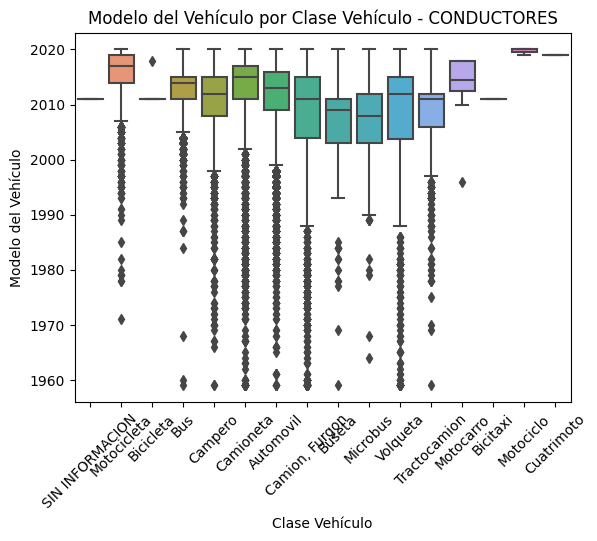

C:\Users\dhoyoso\AppData\Local\Temp\ipykernel_16820\2872972000.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['EDAD_PROCESADA'] = filtered_df['EDAD_PROCESADA'].astype(int)


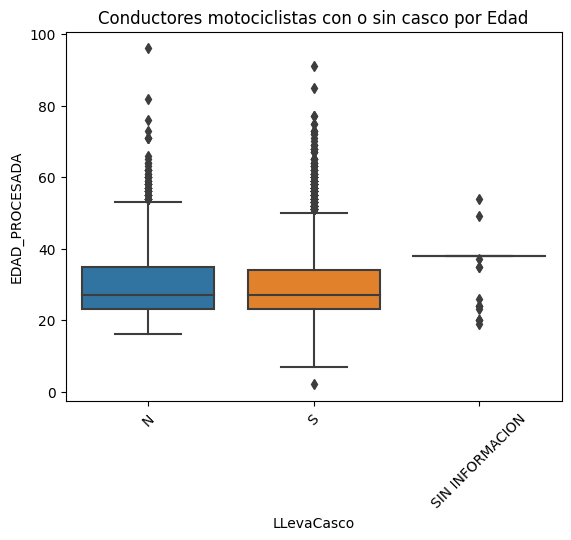

C:\Users\dhoyoso\AppData\Local\Temp\ipykernel_16820\2872972000.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['EDAD_PROCESADA'] = filtered_df['EDAD_PROCESADA'].astype(int)


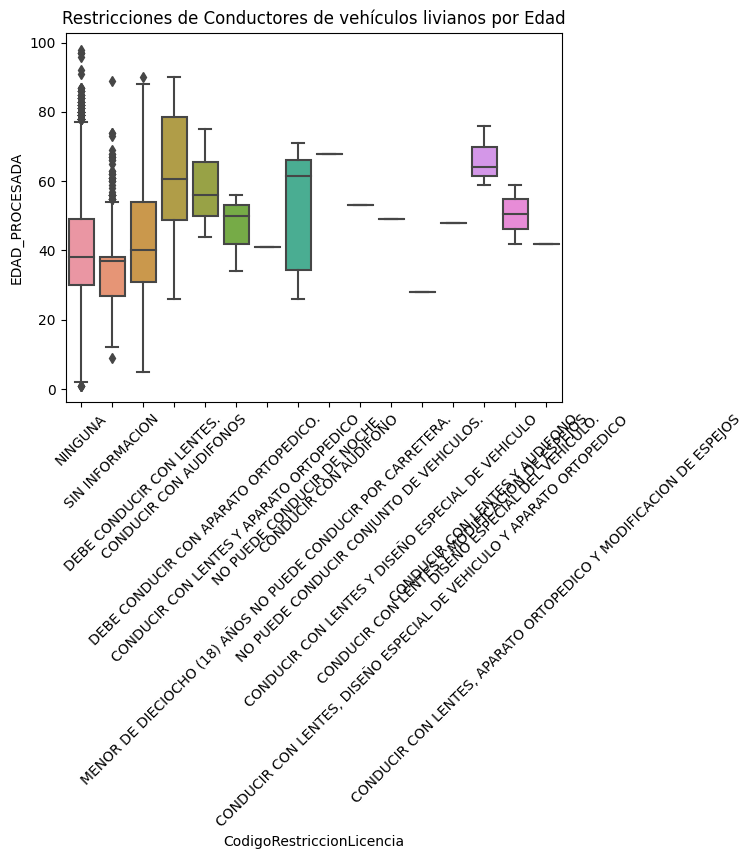

In [26]:
# Gráfico de caja para Puntajes de Gasto por Grupos Etarios y Género
sns.boxplot(data=CONDUCTORES, x='ClaseVehiculo', y='ModeloVehiculo')
plt.title('Modelo del Vehículo por Clase Vehículo - CONDUCTORES')
plt.xlabel('Clase Vehículo')
plt.ylabel('Modelo del Vehículo')
plt.xticks(rotation=45)
plt.show()


filtered_df = CONDUCTORES[CONDUCTORES['VEHICULO_VIAJABA_CLASIFICADO'] == 'MOTOCICLETA']
filtered_df['EDAD_PROCESADA'] = filtered_df['EDAD_PROCESADA'].astype(int)
# Gráfico de caja para Puntajes de Gasto por Grupos Etarios y Género
sns.boxplot(data=filtered_df, x='LLevaCasco', y='EDAD_PROCESADA')
plt.title('Conductores motociclistas con o sin casco por Edad')
plt.xlabel('LLevaCasco')
plt.ylabel('EDAD_PROCESADA')
plt.xticks(rotation=45)
plt.show()


filtered_df = CONDUCTORES[CONDUCTORES['VEHICULO_VIAJABA_CLASIFICADO'] == 'LIVIANO']
filtered_df['EDAD_PROCESADA'] = filtered_df['EDAD_PROCESADA'].astype(int)
# Gráfico de caja para Puntajes de Gasto por Grupos Etarios y Género
sns.boxplot(data=filtered_df, x='CodigoRestriccionLicencia', y='EDAD_PROCESADA')
plt.title('Restricciones de Conductores de vehículos livianos por Edad')
plt.xlabel('CodigoRestriccionLicencia')
plt.ylabel('EDAD_PROCESADA')
plt.xticks(rotation=45)
plt.show()

In [10]:
from pandas_profiling import ProfileReport
profile = ProfileReport(CONDUCTORES)

# To save the report as an HTML file
#profile.to_file("data_profile_report.html")

# To display the report in a Jupyter Notebook
profile.to_notebook_iframe()

C:\Users\dhoyoso\AppData\Local\Temp\ipykernel_16820\1163414124.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\dhoyoso\AppData\Local\Temp\ipykernel_16820\2125103710.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CONDUCTORES['EDAD_PROCESADA'] = CONDUCTORES['EDAD_PROCESADA'].astype(int)


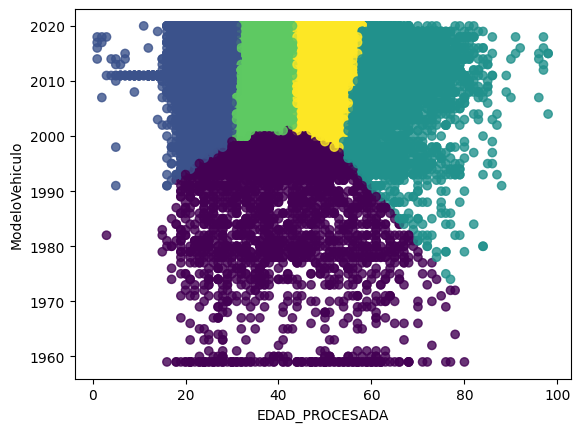

In [32]:
from sklearn.cluster import KMeans

CONDUCTORES['EDAD_PROCESADA'] = CONDUCTORES['EDAD_PROCESADA'].astype(int)

kmeans_5 = KMeans(n_clusters = 5, random_state = 123, n_init=10).fit_predict(CONDUCTORES[['EDAD_PROCESADA','ModeloVehiculo']])

fig, ax = plt.subplots()
g_puntos = plt.scatter(CONDUCTORES[['EDAD_PROCESADA']], CONDUCTORES[['ModeloVehiculo']], c = kmeans_5, alpha = 0.8, label = "Centroides")
ax.set_xlabel('EDAD_PROCESADA')
ax.set_ylabel('ModeloVehiculo')

plt.show()